
# Question 1
## Regularization in Linear Regression

Make a class called LinearRegression which provides two functions : fit and predict. You may use the code present in the repository as template. You need to make the following changes in order to include regularization :

1. To initialize an object of the class, you need to provide 4 parameters : learning_rate, epochs, penalty and alpha (coefficient of the regularization term). Penalty and alpha should have default values of None and 0 respectively.

2. The parameter penalty should take in any one of these inputs : L1 (Lasso), L2 (Ridge) and None (simple LR).

3. Do some basic differentiation to find out the expressions of dC/dw and dC/db when regularization is involved. Use internet whenever necessary.

4. Write if-else statements inside the fit method to cover the different values for dw for different values of penalty.



In [540]:
class LinearRegression:
    def __init__(self, learning_rate, epochs, penalty=None, alpha=0):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.penalty = penalty
        self.alpha = alpha
        self.w = None
        self.b = None


In [541]:
class LinearRegression:
    def __init__(self, learning_rate, epochs, penalty=None, alpha=0):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.penalty = penalty
        self.alpha = alpha
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        num_samples, num_features = X.shape
        
        # initialize weights and bias
        self.w = np.zeros(num_features)
        self.b = 0
        
        for _ in range(self.epochs):
            y_predicted = np.dot(X, self.w) + self.b
            
            # compute gradients based on the chosen penalty
            if self.penalty == "L1":
                dw = (2/num_samples) * np.dot(X.T, (y_predicted - y)) + self.alpha * np.sign(self.w)
            elif self.penalty == "L2":
                dw = (2/num_samples) * np.dot(X.T, (y_predicted - y)) + 2 * self.alpha * self.w
            else:
                dw = (2/num_samples) * np.dot(X.T, (y_predicted - y))

            db = (2/num_samples) * np.sum(y_predicted - y)
            
            # update parameters
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db


In [542]:
class LinearRegression:
    def __init__(self, learning_rate, epochs, penalty=None, alpha=0):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.penalty = penalty
        self.alpha = alpha
        self.w = None
        self.b = None
        
    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.w = np.zeros(num_features)
        self.b = 0

        for _ in range(self.epochs):
            y_predicted = np.dot(X, self.w) + self.b
            
            if self.penalty == "L1":
                dw = (2/num_samples) * np.dot(X.T, (y_predicted - y)) + self.alpha * np.sign(self.w)
            elif self.penalty == "L2":
                dw = (2/num_samples) * np.dot(X.T, (y_predicted - y)) + 2 * self.alpha * self.w
            else:
                dw = (2/num_samples) * np.dot(X.T, (y_predicted - y))

            db = (2/num_samples) * np.sum(y_predicted - y)
            
            self.w -= self.learning_rate * dw
            self.b -= self.learning_rate * db
        
    def predict(self, X):
        y_predicted = np.dot(X, self.w) + self.b
        return y_predicted



# Question 2
## Linear Regression

Use the dataset https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction (*).

1. Read it using pandas.
2. Check for null values.
3. For each of the columns (except the first and last), plot the column values in the X-axis against the last column of prices in the Y-axis.
4. Remove the unwanted columns.
5. Split the dataset into train and test data. Test data size = 25% of total dataset.
6. Normalize the X_train and X_test using MinMaxScaler from sklearn.preprocessing.
7. Fit the training data into the 3 models created in question 1 (linear regression, lasso and ridge regression) and predict the testing data.
8. Use mean square error and R2 from sklearn.metrics as evaluation criterias.
9. Fit the training data into the models of the same name provided by sklearn.linear_model and evaluate the predictions using MSE and R2.
10. Tune the hyperparameters of your models (learning rate, epochs, penalty and alpha) to achieve losses close to that of the sklearn models. (We will cover hyperparameter tuning using GridSearchCV and all in later weeks. For now, you may manually run the model for different values of the hyperparameters.)

Note : (*) To solve this question, you may proceed in any of the following ways :

1. Prepare the notebook in Kaggle, download it and submit it separately with the other questions.
2. Download the dataset from kaggle. Upload it to the session storage in Colab.
3. Use Colab data directly in Colab. Refer here. For this, you need to create kaggle API token. Before submitting, hide or remove the API token.



In [543]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression as SklearnLinearRegression
from sklearn.linear_model import Lasso as SklearnLasso
from sklearn.linear_model import Ridge as SklearnRidge


In [544]:
df = pd.read_csv('/kaggle/input/real-estate-price-prediction/Real estate.csv')
print(df.head(5))
df.shape

   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

(414, 8)

In [545]:
df.isnull().sum()


No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

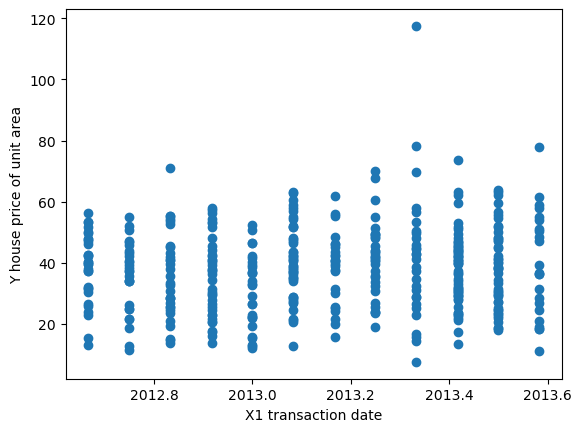

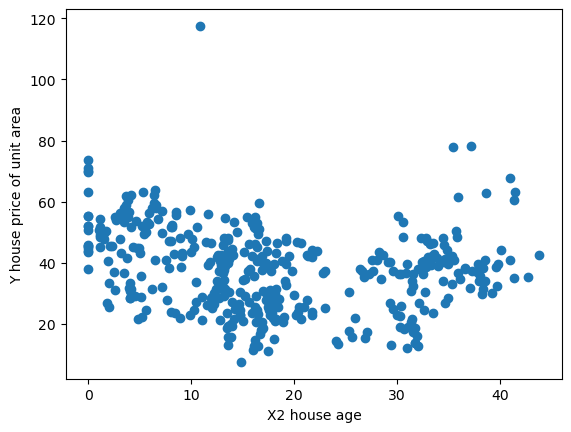

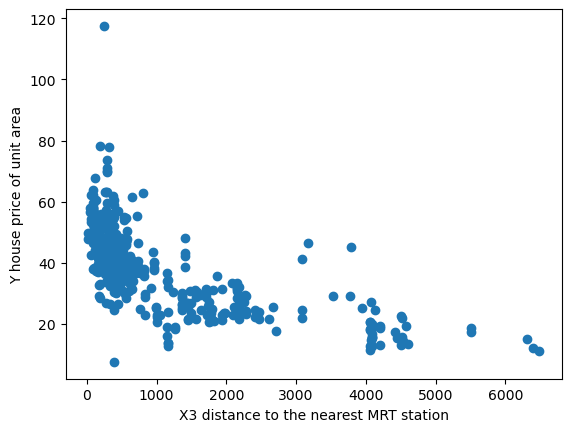

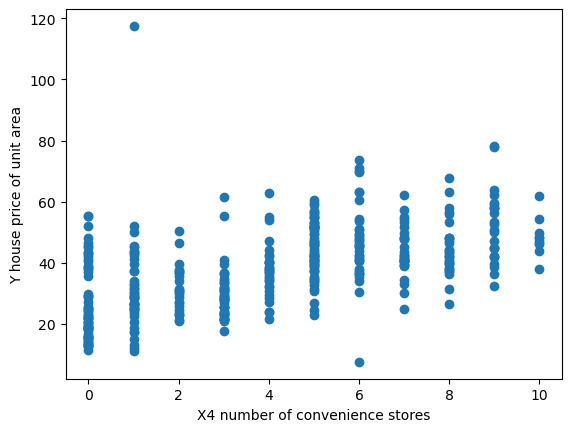

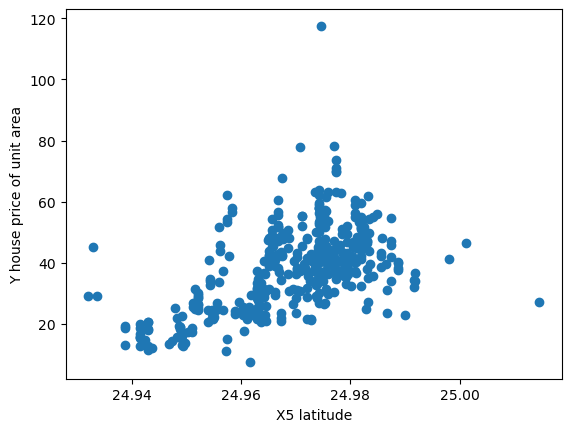

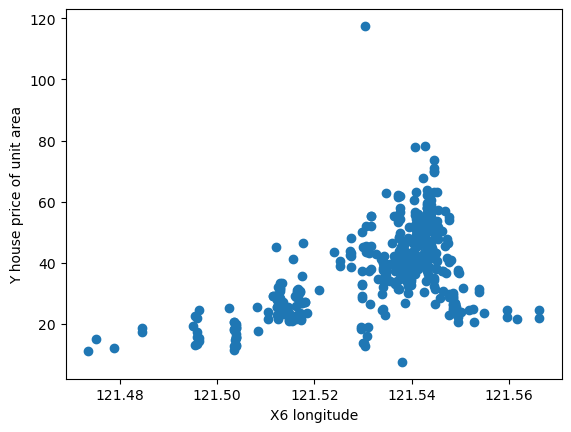

In [546]:
for column in df.columns[1:-1]:
    plt.scatter(df[column], df['Y house price of unit area'])
    plt.xlabel(column)
    plt.ylabel('Y house price of unit area')
    plt.show()


In [547]:
df = df.drop(columns=['No'])
print(df.shape)

(414, 7)


In [548]:
X = df.drop('Y house price of unit area', axis=1)
y = df['Y house price of unit area']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [549]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [550]:
linear_regression = LinearRegression(learning_rate=0.01, epochs=1000)
lasso = LinearRegression(learning_rate=0.01, epochs=1000, penalty='L1', alpha=0.1)
ridge = LinearRegression(learning_rate=0.01, epochs=1000, penalty='L2', alpha=0.1)


In [551]:
# Fit and predict Linear Regression
linear_regression.fit(X_train, y_train)
y_pred_lr = linear_regression.predict(X_test)

# Fit and predict Lasso
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# Fit and predict Ridge
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)


In [552]:
# Evaluation for Linear Regression
print('MSE for Linear Regression: ', mean_squared_error(y_test, y_pred_lr))
print('R-squared for Linear Regression: ', r2_score(y_test, y_pred_lr))

# Evaluation for Lasso
print('MSE for Lasso: ', mean_squared_error(y_test, y_pred_lasso))
print('R-squared for Lasso: ', r2_score(y_test, y_pred_lasso))

# Evaluation for Ridge
print('MSE for Ridge: ', mean_squared_error(y_test, y_pred_ridge))
print('R-squared for Ridge: ', r2_score(y_test, y_pred_ridge))


MSE for Linear Regression:  69.04778198840724
R-squared for Linear Regression:  0.5646930570112327
MSE for Lasso:  69.39030510463773
R-squared for Lasso:  0.5625336438290061
MSE for Ridge:  85.12850855963136
R-squared for Ridge:  0.4633132338920327


In [553]:
# Sklearn Linear Regression
lr = SklearnLinearRegression()
lr.fit(X_train, y_train)
y_pred_lr_sklearn = lr.predict(X_test)

# Sklearn Lasso
lasso_sklearn = SklearnLasso(alpha=0.1)
lasso_sklearn.fit(X_train, y_train)
y_pred_lasso_sklearn = lasso_sklearn.predict(X_test)

# Sklearn Ridge
ridge_sklearn = SklearnRidge(alpha=0.1)
ridge_sklearn.fit(X_train, y_train)
y_pred_ridge_sklearn = ridge_sklearn.predict(X_test)


In [554]:
# Evaluation for Sklearn Linear Regression
print('MSE for Sklearn Linear Regression: ', mean_squared_error(y_test, y_pred_lr_sklearn))
print('R-squared for Sklearn Linear Regression: ', r2_score(y_test, y_pred_lr_sklearn))

# Evaluation for Sklearn Lasso
print('MSE for Sklearn Lasso: ', mean_squared_error(y_test, y_pred_lasso_sklearn))
print('R-squared for Sklearn Lasso: ', r2_score(y_test, y_pred_lasso_sklearn))

# Evaluation for Sklearn Ridge
print('MSE for Sklearn Ridge: ', mean_squared_error(y_test, y_pred_ridge_sklearn))
print('R-squared for Sklearn Ridge: ', r2_score(y_test, y_pred_ridge_sklearn))


MSE for Sklearn Linear Regression:  66.6733627183596
R-squared for Sklearn Linear Regression:  0.579662418286177
MSE for Sklearn Lasso:  65.71283342483493
R-squared for Sklearn Lasso:  0.5857180084640858
MSE for Sklearn Ridge:  66.43744797904603
R-squared for Sklearn Ridge:  0.5811497263650061



# Question 3
## Logistic Regression

The breast cancer dataset is a binary classification dataset commonly used in machine learning tasks. It is available in scikit-learn (sklearn) as part of its datasets module. Here is an explanation of the breast cancer dataset's components:

Features (X):

The breast cancer dataset consists of 30 numeric features representing different characteristics of the FNA images. These features include mean, standard error, and worst (largest) values of various attributes such as radius, texture, smoothness, compactness, concavity, symmetry, fractal dimension, etc.

Target (y):

The breast cancer dataset is a binary classification problem, and the target variable (y) represents the diagnosis of the breast mass. It contains two classes:
        0: Represents a malignant (cancerous) tumor.
        1: Represents a benign (non-cancerous) tumor.

Complete the code given below in place of the "..."

1. Load the dataset from sklearn.datasets
2. Separate out the X and Y columns.
3. Normalize the X data using MinMaxScaler or StandardScaler.
4. Create a train-test-split. Take any suitable test size.



In [555]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the breast cancer dataset
bc_dataset = datasets.load_breast_cancer()
X = bc_dataset.data
y = bc_dataset.target
print("Shape of the features: ", bc_dataset.data.shape)
print("Shape of the target: ", bc_dataset.target.shape)

Shape of the features:  (569, 30)
Shape of the target:  (569,)


In [556]:
import pandas as pd

# Convert the Bunch object to a DataFrame
df = pd.DataFrame(data=np.c_[bc_dataset.data, bc_dataset.target], columns=bc_dataset.feature_names.tolist() + ["target"])

# Print the "head" of the DataFrame
print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [557]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [558]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


5. Write code for the sigmoid function and Logistic regression.

(Logistic Regression code is available in the Week2/Examples folder. However, try to code it yourself. A template is provided for that.)

Optional : Include the regularization terms as you did in the first question.


In [559]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y = y.reshape(-1, 1)

        self.weights = np.zeros((n_features, 1))
        self.bias = 0

        for _ in range(self.epochs):
            z = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(z)

            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(z)
        return np.round(y_pred)


6. Fit your model on the dataset and make predictions.
7. Compare your model with the Sklearn Logistic Regression model. Try out all the different penalties.
8. Print accuracy_score in each case using sklearn.metrics .



In [560]:
lr = LogisticRegression(learning_rate=0.01, epochs=1000)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [561]:
sklearn_lr = SklearnLogisticRegression()
sklearn_lr.fit(X_train, y_train)
sklearn_y_pred = sklearn_lr.predict(X_test)

print("Our Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred))
print("Sklearn Logistic Regression Accuracy: ", accuracy_score(y_test, sklearn_y_pred))


Our Logistic Regression Accuracy:  0.9883040935672515
Sklearn Logistic Regression Accuracy:  0.9824561403508771


9. For the best model in each case (yours and scikit-learn), print the classification_report using sklearn.metrics .
10. For the best model in each case (yours and scikit-learn), print the confusion_matrix using sklearn.metrics .
11. Optional Challenge : For the best model in each case (yours and scikit-learn), print the roc_auc_score and plot the roc curves using sklearn.metrics and matplotlib.



In [562]:
print("Our Logistic Regression:\n", classification_report(y_test, y_pred))
print("Sklearn Logistic Regression:\n", classification_report(y_test, sklearn_y_pred))

print("Our Logistic Regression:\n", confusion_matrix(y_test, y_pred))
print("Sklearn Logistic Regression:\n", confusion_matrix(y_test, sklearn_y_pred))


Our Logistic Regression:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98        63
           1       0.99      0.99      0.99       108

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

Sklearn Logistic Regression:
               precision    recall  f1-score   support

           0       0.97      0.98      0.98        63
           1       0.99      0.98      0.99       108

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171

Our Logistic Regression:
 [[ 62   1]
 [  1 107]]
Sklearn Logistic Regression:
 [[ 62   1]
 [  2 106]]


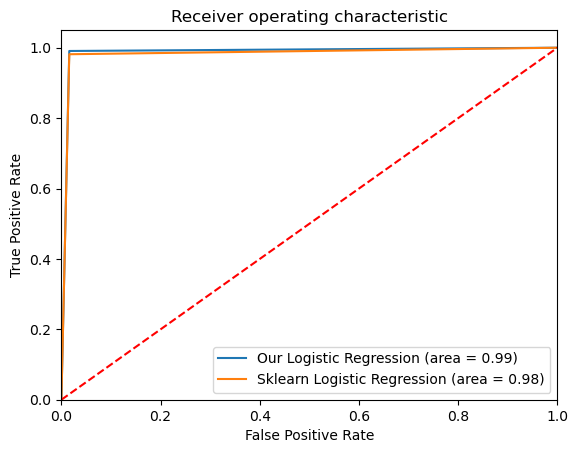

In [563]:
roc_auc_ours = roc_auc_score(y_test, y_pred)
roc_auc_sklearn = roc_auc_score(y_test, sklearn_y_pred)

fpr_ours, tpr_ours, _ = roc_curve(y_test, y_pred)
fpr_sklearn, tpr_sklearn, _ = roc_curve(y_test, sklearn_y_pred)

plt.figure()
plt.plot(fpr_ours, tpr_ours, label='Our Logistic Regression (area = %0.2f)' % roc_auc_ours)
plt.plot(fpr_sklearn, tpr_sklearn, label='Sklearn Logistic Regression (area = %0.2f)' % roc_auc_sklearn)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


# Question 4
## KNN and Decision Tree

How accurately can a K-Nearest Neighbors (KNN) model classify different types of glass based on a glass classification dataset consisting of 214 samples and 7 classes? Use the kaggle dataset "https://www.kaggle.com/datasets/uciml/glass".

Context: This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

1. Load the data as you did in the 2nd question.
2. Extract the X and Y columns.
3. Split it into training and testing datasets.



In [564]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier as SklearnKNN
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from collections import Counter

df = pd.read_csv('/kaggle/input/glass/glass.csv')
print(df.head(15))
print(df.shape)

         RI     Na    Mg    Al     Si     K    Ca   Ba    Fe  Type
0   1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.00     1
1   1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.00     1
2   1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.00     1
3   1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.00     1
4   1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.00     1
5   1.51596  12.79  3.61  1.62  72.97  0.64  8.07  0.0  0.26     1
6   1.51743  13.30  3.60  1.14  73.09  0.58  8.17  0.0  0.00     1
7   1.51756  13.15  3.61  1.05  73.24  0.57  8.24  0.0  0.00     1
8   1.51918  14.04  3.58  1.37  72.08  0.56  8.30  0.0  0.00     1
9   1.51755  13.00  3.60  1.36  72.99  0.57  8.40  0.0  0.11     1
10  1.51571  12.72  3.46  1.56  73.20  0.67  8.09  0.0  0.24     1
11  1.51763  12.80  3.66  1.27  73.01  0.60  8.56  0.0  0.00     1
12  1.51589  12.88  3.43  1.40  73.28  0.69  8.05  0.0  0.24     1
13  1.51748  12.86  3.56  1.27  73.21  0.54  8.38  0.0  0.17  

In [565]:
X = df.iloc[:, :-1]  # assuming the last column is the target variable
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


4. Define Euclidean distance.
5. Build the KNN model.
6. Fit the model on the training data. (Note : you may require to change the type of the data from pandas dataframe to numpy arrays. To do that, just do this X=np.array(X) and so on...)



In [566]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


7. Make predictions. Find their accuracy using accuracy_score. Try different k values. k=3 worked well in our case.
8. Compare with the sklearn model (from sklearn.neighbors import KNeighborsClassifier)



In [567]:
knn = KNN(k=3)
knn.fit(X_train.to_numpy(), y_train.to_numpy())
y_pred = knn.predict(X_test.to_numpy())

print("Custom KNN Accuracy: ", accuracy_score(y_test, y_pred))


Custom KNN Accuracy:  0.676923076923077


In [568]:
sklearn_knn = SklearnKNN(n_neighbors=3)
sklearn_knn.fit(X_train, y_train)
sklearn_y_pred = sklearn_knn.predict(X_test)

print("Sklearn KNN Accuracy: ", accuracy_score(y_test, sklearn_y_pred))


Sklearn KNN Accuracy:  0.6461538461538462


9. Finally use sklearn.tree to implement a Decision Tree Classifier on this dataset. Check for max depth = 5 to 10. Find out its accuracy.
10. Plot the decision tree.



Decision Tree Accuracy:  0.6615384615384615


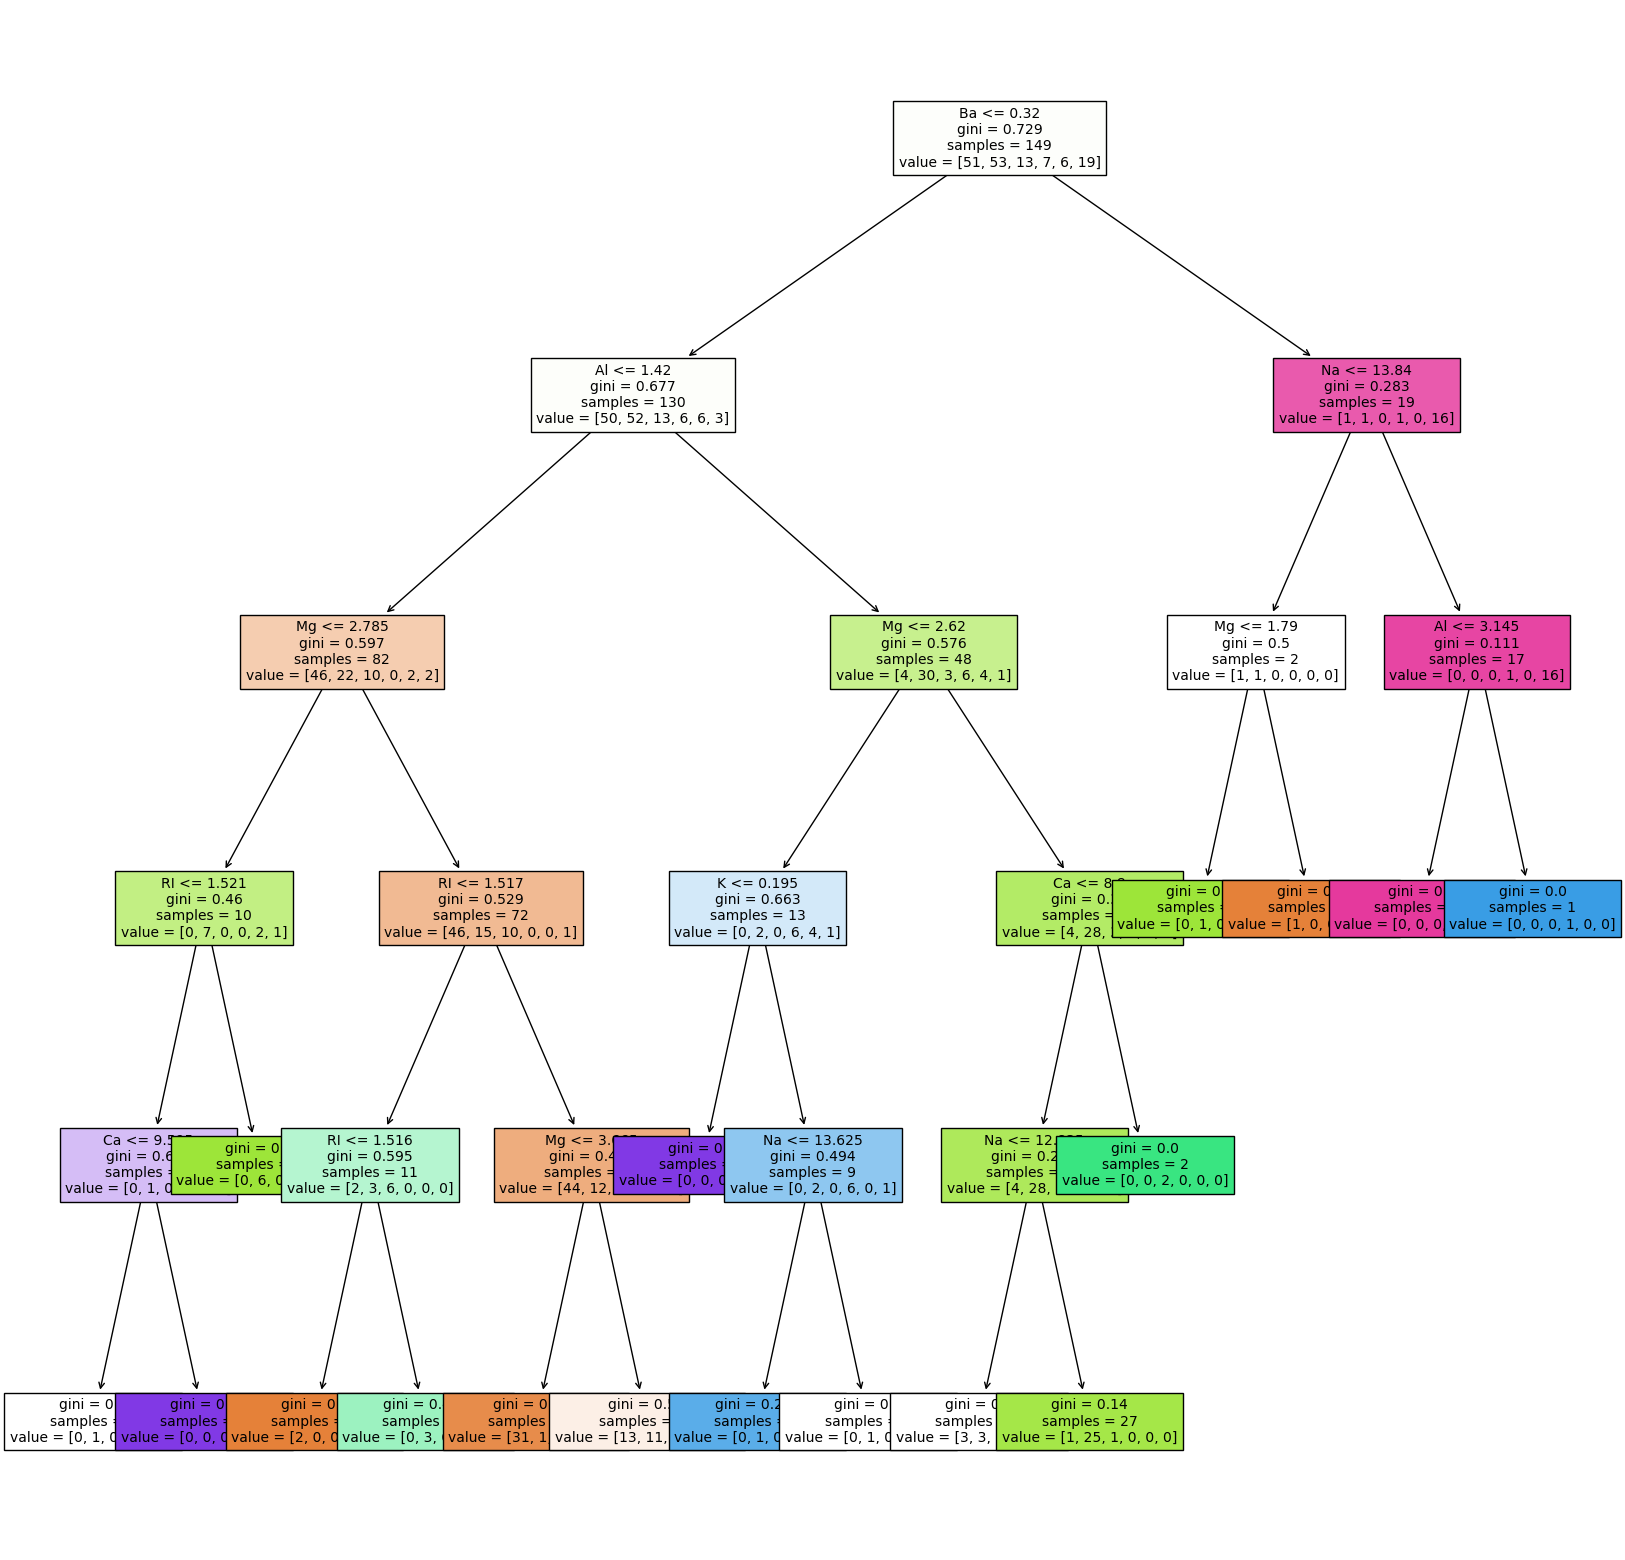

In [569]:
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

print("Decision Tree Accuracy: ", accuracy_score(y_test, y_pred_dtc))

fig, ax = plt.subplots(figsize=(20, 20)) 

plot_tree(dtc, filled=True, ax=ax, fontsize=10, feature_names=X.columns) 

plt.show()
